In [27]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [29]:
data=data[data.country_region=="United States"]

In [30]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [31]:
data=data[data.date.astype(str).str.contains("2020-02")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794395,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1794396,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
1794397,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
1794398,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
1794399,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332296,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-02-24,NaN,NaN,NaN,NaN,-4.0,NaN
2332297,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-02-25,NaN,-9.0,NaN,NaN,2.0,NaN
2332298,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-02-26,NaN,-4.0,NaN,NaN,-6.0,NaN
2332299,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-02-27,NaN,NaN,NaN,NaN,0.0,NaN


In [32]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [33]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794395  United States          NaN  2020-02-15   
1794396  United States          NaN  2020-02-16   
1794397  United States          NaN  2020-02-17   
1794398  United States          NaN  2020-02-18   
1794399  United States          NaN  2020-02-19   
...                ...          ...         ...   
2332296  United States      Wyoming  2020-02-24   
2332297  United States      Wyoming  2020-02-25   
2332298  United States      Wyoming  2020-02-26   
2332299  United States      Wyoming  2020-02-27   
2332300  United States      Wyoming  2020-02-28   

         retail_and_recreation_percent_change_from_baseline  \
1794395                                                6.0    
1794396                                                7.0    
1794397                                                6.0    
1794398                                                0.0    
1794399                                   

In [34]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-34-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [35]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794598  United States      Alabama  2020-02-15   
1794599  United States      Alabama  2020-02-16   
1794600  United States      Alabama  2020-02-17   
1794601  United States      Alabama  2020-02-18   
1794602  United States      Alabama  2020-02-19   
...                ...          ...         ...   
2331537  United States      Wyoming  2020-02-24   
2331538  United States      Wyoming  2020-02-25   
2331539  United States      Wyoming  2020-02-26   
2331540  United States      Wyoming  2020-02-27   
2331541  United States      Wyoming  2020-02-28   

         retail_and_recreation_percent_change_from_baseline  \
1794598                                                5.0    
1794599                                                0.0    
1794600                                                3.0    
1794601                                               -4.0    
1794602                                   

In [36]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-36-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794598,United States,Alabama,2020-02-15,-0.083034,0.009149,0.276534,0.299933,-0.533359
1794599,United States,Alabama,2020-02-16,-0.825625,-0.587642,-0.096902,-0.092336,0.410836
1794600,United States,Alabama,2020-02-17,-0.380070,-0.289246,0.276534,-2.184436,1.827127
1794601,United States,Alabama,2020-02-18,-1.419699,-0.736839,-0.470338,0.169177,0.882933
1794602,United States,Alabama,2020-02-19,-0.231552,-0.140049,-0.003543,0.169177,-0.061262
...,...,...,...,...,...,...,...,...
2331537,United States,Wyoming,2020-02-24,-0.231552,1.650322,-1.590645,0.430690,-0.061262
2331538,United States,Wyoming,2020-02-25,0.214003,0.307544,-0.283620,0.299933,-0.533359
2331539,United States,Wyoming,2020-02-26,0.065484,0.904334,-0.376979,0.299933,-0.061262
2331540,United States,Wyoming,2020-02-27,0.659558,1.202729,0.836688,-0.092336,-0.533359


In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.46348438 0.24230144 0.16348582 0.10679269]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,0.511183,-0.316860,0.223095,-0.050869
1,-0.895234,-0.502970,0.345292,-0.200060
2,-2.256347,1.706265,0.527942,-0.323780
3,-1.479618,-0.991697,0.215990,-0.504069
4,-0.040162,-0.301936,0.097388,-0.057850
...,...,...,...,...
12063,0.296313,-0.220701,-2.099477,-0.951732
12064,0.571289,-0.206172,-0.451826,0.066905
12065,0.449450,0.074945,-0.752722,-0.493502
12066,1.312280,0.946770,0.041396,-0.465552


In [38]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,0.408636,0.524776,-0.170170,0.681572
grocery_and_pharmacy_percent_change_from_baseline,0.412979,0.392752,-0.454195,-0.682775
transit_stations_percent_change_from_baseline,0.329384,0.289893,0.872699,-0.212547
workplaces_percent_change_from_baseline,0.458313,-0.618888,0.005253,-0.033634
residential_percent_change_from_baseline,-0.586447,0.321396,0.055845,-0.151560


In [1]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: retail, grocery, workplaces")
print("Greatest contributors to PC2: retail, grocery, residential, transit")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: retail")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: retail, grocery, workplaces
Greatest contributors to PC2: retail, grocery, residential, transit
Greatest contributor to PC3: transit
Greatest contributors to PC4: retail


In [ ]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [40]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [41]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,0.511183,-0.316860,0.223095,-0.050869,3
1,-0.895234,-0.502970,0.345292,-0.200060,0
2,-2.256347,1.706265,0.527942,-0.323780,1
3,-1.479618,-0.991697,0.215990,-0.504069,0
4,-0.040162,-0.301936,0.097388,-0.057850,3
...,...,...,...,...,...
12063,0.296313,-0.220701,-2.099477,-0.951732,3
12064,0.571289,-0.206172,-0.451826,0.066905,3
12065,0.449450,0.074945,-0.752722,-0.493502,3
12066,1.312280,0.946770,0.041396,-0.465552,2


In [42]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [43]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,0.511183,-0.316860,0.223095,-0.050869,3,Alabama
1,-0.895234,-0.502970,0.345292,-0.200060,0,Alabama
2,-2.256347,1.706265,0.527942,-0.323780,1,Alabama
3,-1.479618,-0.991697,0.215990,-0.504069,0,Alabama
4,-0.040162,-0.301936,0.097388,-0.057850,3,Alabama
...,...,...,...,...,...,...
12063,0.296313,-0.220701,-2.099477,-0.951732,3,Wyoming
12064,0.571289,-0.206172,-0.451826,0.066905,3,Wyoming
12065,0.449450,0.074945,-0.752722,-0.493502,3,Wyoming
12066,1.312280,0.946770,0.041396,-0.465552,2,Wyoming


In [44]:
pca_data.Cluster.unique()

array([3, 0, 1, 2], dtype=int32)

In [45]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 76, 'Alaska': 11, 'Arizona': 24, 'Arkansas': 62, 'California': 149, 'Colorado': 67, 'Connecticut': 48, 'Delaware': 10, 'District of Columbia': 9, 'Florida': 130, 'Georgia': 139, 'Hawaii': 25, 'Idaho': 8, 'Illinois': 122, 'Indiana': 96, 'Iowa': 50, 'Kansas': 62, 'Kentucky': 66, 'Louisiana': 89, 'Maine': 10, 'Maryland': 82, 'Massachusetts': 71, 'Michigan': 88, 'Minnesota': 50, 'Mississippi': 52, 'Missouri': 66, 'Montana': 15, 'Nebraska': 22, 'Nevada': 6, 'New Hampshire': 30, 'New Jersey': 131, 'New Mexico': 18, 'New York': 186, 'North Carolina': 127, 'North Dakota': 26, 'Ohio': 139, 'Oklahoma': 51, 'Oregon': 24, 'Pennsylvania': 168, 'Rhode Island': 24, 'South Carolina': 112, 'South Dakota': 10, 'Tennessee': 123, 'Texas': 213, 'Utah': 24, 'Vermont': 15, 'Virginia': 151, 'Washington': 12, 'West Virginia': 31, 'Wisconsin': 95, 'Wyoming': 16}, {'Alabama': 17, 'Alaska': 3, 'Arizona': 13, 'Arkansas': 12, 'California': 44, 'Colorado': 15, 'Connecticut': 8, 'Delaware': 4, 'District 

In [46]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 76, 1: 17, 2: 63, 3: 80}
{0: 11, 1: 3, 2: 14, 3: 25}
{0: 24, 1: 13, 2: 38, 3: 98}
{0: 62, 1: 12, 2: 49, 3: 63}
{0: 149, 1: 44, 2: 58, 3: 332}
{0: 67, 1: 15, 2: 19, 3: 125}
{0: 48, 1: 8, 2: 4, 3: 55}
{0: 10, 1: 4, 2: 3, 3: 38}
{0: 9, 1: 1, 3: 5}
{0: 130, 1: 35, 2: 69, 3: 339}
{0: 139, 1: 36, 2: 82, 3: 149}
{0: 25, 1: 5, 3: 40}
{0: 8, 1: 5, 2: 37, 3: 64}
{0: 122, 1: 30, 2: 89, 3: 141}
{0: 96, 1: 26, 2: 82, 3: 203}
{0: 50, 1: 4, 2: 68, 3: 44}
{0: 62, 1: 8, 2: 43, 3: 75}
{0: 66, 1: 15, 2: 42, 3: 99}
{0: 89, 1: 31, 2: 85, 3: 79}
{0: 10, 1: 13, 2: 15, 3: 33}
{0: 82, 1: 14, 2: 6, 3: 106}
{0: 71, 1: 14, 2: 5, 3: 84}
{0: 88, 1: 36, 2: 51, 3: 115}
{0: 50, 1: 11, 2: 17, 3: 87}
{0: 52, 1: 16, 2: 57, 3: 43}
{0: 66, 1: 19, 2: 88, 3: 108}
{0: 15, 1: 7, 2: 18, 3: 58}
{0: 22, 1: 5, 2: 34, 3: 42}
{0: 6, 1: 5, 2: 20, 3: 40}
{0: 30, 1: 7, 2: 4, 3: 38}
{0: 131, 1: 21, 2: 14, 3: 142}
{0: 18, 1: 11, 2: 64, 3: 69}
{0: 186, 1: 67, 2: 29, 3: 194}
{0: 127, 1: 50, 2: 58, 3: 173}
{0: 26, 1: 6, 2: 14, 3: 43}
{0

In [47]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: [], 2: ['Iowa', 'Mississippi'], 3: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 4: [], 0: ['District of Columbia', 'Louisiana', 'South Carolina']}


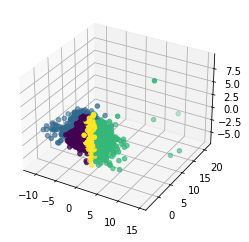

In [48]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [54]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of          PC 1      PC 2      PC 3      PC 4 Cluster    State
0    0.511183 -0.316860  0.223095 -0.050869       3  Alabama
1    2.402937  0.756021 -0.699974  0.179275       2  Alabama
2   -1.734853  0.875343  0.659842 -0.618618       0  Alabama
3   -1.508794 -0.883709  0.296778 -0.519515       0  Alabama
4    0.846768 -0.356439  0.487154  0.590279       3  Alabama
..        ...       ...       ...       ...     ...      ...
800  1.398983  0.276802  0.269889 -0.709193       2  Wyoming
801  1.298889 -0.164930  0.358296  0.252031       3  Wyoming
802 -4.473771  4.489991  1.562970 -0.081501       1  Wyoming
803 -4.268551  2.180022  0.984569 -0.475797       1  Wyoming
804 -1.054865 -1.033044 -0.044947  0.332479       0  Wyoming

[805 rows x 6 columns]>

In [55]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,0.511183,-0.316860,0.223095,-0.050869,3,Alabama
1,2.402937,0.756021,-0.699974,0.179275,2,Alabama
2,-1.734853,0.875343,0.659842,-0.618618,0,Alabama
3,-1.508794,-0.883709,0.296778,-0.519515,0,Alabama
4,0.846768,-0.356439,0.487154,0.590279,3,Alabama
...,...,...,...,...,...,...
800,1.398983,0.276802,0.269889,-0.709193,2,Wyoming
801,1.298889,-0.164930,0.358296,0.252031,3,Wyoming
802,-4.473771,4.489991,1.562970,-0.081501,1,Wyoming
803,-4.268551,2.180022,0.984569,-0.475797,1,Wyoming


In [56]:
clusters_and_their_states.values()

dict_values([[], ['Iowa', 'Mississippi'], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], [], ['District of Columbia', 'Louisiana', 'South Carolina']])

In [57]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [60]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("Feb Mobility KMeans.html")
                   )


'Feb Mobility KMeans.html'